<a href="https://colab.research.google.com/github/manliofrp/Actividad_7/blob/main/Actividad_7_Equipo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regresión Logistica**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
#Cargar el archivo
#from google.colab import files
#files.upload()

In [ ]:
#df = pd.read_csv("TrainingDataComplete.csv",index_col="Id")
df = pd.read_csv("BD_Socio formador (TrainingDataComplete).csv",index_col="Id")
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
#Información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


##**Preprocesamiento**

###Valores nulos

In [ ]:
#Identificación de valores nulos en el DataFrame

#Valores nulos por columna
print("Datos nulos:")
print()
print(df.isnull().sum())
print()

nulos=df.isnull().sum().sum()
print('EL DataFrame cuanta con', nulos, 'valores nulos')

Datos nulos:

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

EL DataFrame cuanta con 0 valores nulos


Las columnas del DataFrame no contienen valores nulos, por lo tanto, procederemos a realizar el análisis de outliers en las variables numéricas.

###Outliers

<Figure size 1000x500 with 0 Axes>

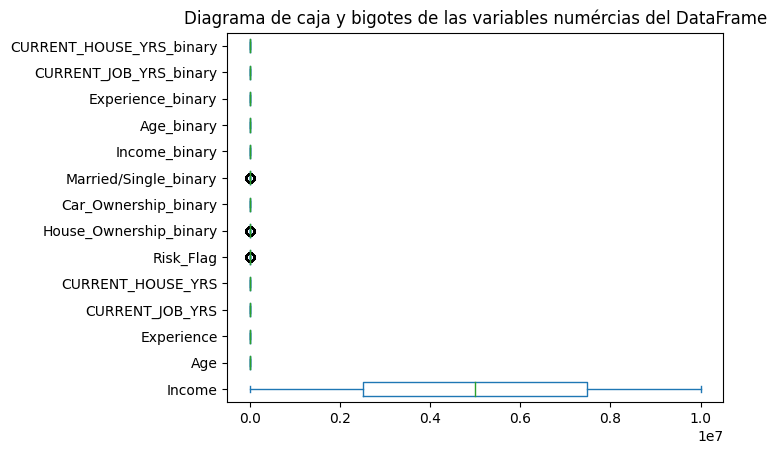

In [ ]:
#Boxplot de las variables numércias del DataFrame para visuaizar los valores atípicos
fig = plt.figure(figsize=(10,5))
df.plot(kind="box",vert=False)
plt.title("Diagrama de caja y bigotes de las variables numércias del DataFrame")
plt.show()

In [ ]:
#Análisis de la variable "Risk_Flag"
df["Risk_Flag"].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

Variable de "Risk_flag", es de tipo binaria por lo que su eliminación es innecesaria.

##**Conversión a Variables Dicotómicas**

Convertir las variables que sean necesarias en variables de tipo  dicotómica con las categorías que se consideren pertinentes, aplicando la herramienta de  “Regresión Logística”

###Categoricas a dicotómicas

In [ ]:
#Información general del frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


In [ ]:
#Verificar valores dentro de cada variable categórica
columnas = df.columns

for i in columnas:
  if df[i].dtype == "object":
    print()
    print("Variable:", i)
    print("Contiene:",len(np.unique(df[i])),"valores")
    #print("Valores:",np.unique(df[i]))
    print()


Variable: Married/Single
Contiene: 2 valores


Variable: House_Ownership
Contiene: 3 valores


Variable: Car_Ownership
Contiene: 2 valores


Variable: Profession
Contiene: 51 valores


Variable: CITY
Contiene: 317 valores


Variable: STATE
Contiene: 29 valores



Las variables de 'STATE', 'CITY' y 'Profession', no se pueden transformar a tipo Dicotómicas, ya que tiene diversos valores unicos, como para agruparlos en solo dos categorias.

In [ ]:
#Convertir la variable categóricas con 2 ó 3 valores a dicotómica (binaria numérica)
df['House_Ownership_binary']= np.where(df['House_Ownership']=="owned",0,1)
df['Car_Ownership_binary']= np.where(df['Car_Ownership']=="no",0,1)
df['Married/Single_binary']= np.where(df['Married/Single']=="single",0,1)

#Visualizamos las nuevas variables diatómicas
df[["House_Ownership","House_Ownership_binary","Car_Ownership","Car_Ownership_binary","Married/Single","Married/Single_binary"]].head(15)

,House_Ownership,House_Ownership_binary,Car_Ownership,Car_Ownership_binary,Married/Single,Married/Single_binary
Id,,,,,,
1,rented,1,no,0,single,0
2,rented,1,no,0,single,0
3,rented,1,no,0,married,1
4,rented,1,yes,1,single,0
5,rented,1,no,0,single,0
6,rented,1,no,0,single,0
7,rented,1,no,0,married,1
8,rented,1,no,0,single,0
9,rented,1,yes,1,single,0


###Numéricas a dicotómicas

In [ ]:
#Información general del frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Income                  252000 non-null  int64 
 1   Age                     252000 non-null  int64 
 2   Experience              252000 non-null  int64 
 3   Married/Single          252000 non-null  object
 4   House_Ownership         252000 non-null  object
 5   Car_Ownership           252000 non-null  object
 6   Profession              252000 non-null  object
 7   CITY                    252000 non-null  object
 8   STATE                   252000 non-null  object
 9   CURRENT_JOB_YRS         252000 non-null  int64 
 10  CURRENT_HOUSE_YRS       252000 non-null  int64 
 11  Risk_Flag               252000 non-null  int64 
 12  House_Ownership_binary  252000 non-null  int64 
 13  Car_Ownership_binary    252000 non-null  int64 
 14  Married/Single_binary   252000 non-n

In [ ]:
#Convertir las variables numéricas a diatómicas siendo la división de las 2 categórias la media de los datos
df['Income_binary']= np.where(df['Income']<=df['Income'].mean(),0,1)
df['Age_binary']= np.where(df['Age']<=df['Age'].mean(),0,1)
df['Experience_binary']= np.where(df['Experience']<=df['Experience'].mean(),0,1)
df['CURRENT_JOB_YRS_binary']= np.where(df['CURRENT_JOB_YRS']<=df['CURRENT_JOB_YRS'].mean(),0,1)
df['CURRENT_HOUSE_YRS_binary']= np.where(df['CURRENT_HOUSE_YRS']<=df['CURRENT_HOUSE_YRS'].mean(),0,1)

##**Regresión Logística**

###Correlación entre las variables del frame

Analizar 10 casos de correlación logística que existe entre diferentes variables de nuestra base de datos, aplicando la herramienta de “Regresión Logística”

In [ ]:
#Tabla con las correlacioens absolutas entre las variables
Corr_Factores = abs(df[columnas].corr())
Corr_Factores

<ipython-input-56-cb58922b84f5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factores = abs(df[columnas].corr())


,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Income,1.000000,0.000652,0.006422,0.007045,0.002397,0.003091
Age,0.000652,1.000000,0.001118,0.002154,0.020134,0.021809
Experience,0.006422,0.001118,1.000000,0.646098,0.019309,0.034523
CURRENT_JOB_YRS,0.007045,0.002154,0.646098,1.000000,0.005372,0.016942
CURRENT_HOUSE_YRS,0.002397,0.020134,0.019309,0.005372,1.000000,0.004375
Risk_Flag,0.003091,0.021809,0.034523,0.016942,0.004375,1.000000


<Axes: >

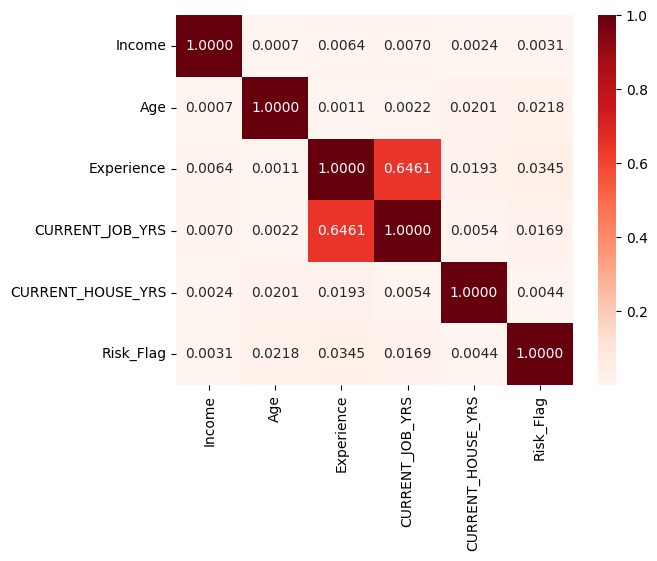

In [ ]:
#Mapa de calor con las correlaciones entre las variable del dataframe
Heat_Map = sns.heatmap(Corr_Factores, cmap = 'Reds', annot = True, fmt = ".4f")
Heat_Map

Desarrollamos un total de 10 modelos de regresión logística, en cada uno seleccionamos variables dependientes e independientes diferentes, en función de la predicción que se quería realizar.

### Regresión logistica 1

- X = 'Age', 'Income', 'Experience'
- y = 'Risk_Flag'

In [ ]:
# Variables independientes y Variable dependiente
X1 = df[['Age','Income', 'Experience']]
y1 = df['Risk_Flag']


# Dividir el conjunto de datos en entrenamiento y prueba
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=None)

#Escalan los datos x esta dividida por 3 variables = uniformidad en escalas
escalar1= StandardScaler()

# Escalamiento solo para las variables independientes de prueba y entrenamiento
X1_test= escalar1.fit_transform(X1_test)
X1_train= escalar1.fit_transform(X1_train)

# Definir el algoritmo a usar
algoritmo1 = LogisticRegression()

#Entrenar el modelo ( ajuste del modelo )
algoritmo1.fit(X1_train,y1_train)

# Realizar la prediccion:: y_pred es el vector de predicciones
y1_pred= algoritmo1.predict(X1_test)

# Verificar la matriz de confusion
matriz1= confusion_matrix(y1_test, y1_pred)
print("Matriz de confusión\n")
print(matriz1)
print()

print("Al tratar de predecir las personas que no han incumplidos pagos (0)\n")

# Conocer la presicion del modelo
precision0= precision_score(y1_test,y1_pred, average='binary', pos_label=0)
print('Precision del modelo:',precision0)
print()

# Conocer la exactirud del modelo
Exactitud1= accuracy_score(y1_test,y1_pred)
print('Exactitud del modelo:',Exactitud1)
print()

## Conocer la sensibilidad del modelo
sensibilidad1= recall_score(y1_test,y1_pred,average='binary', pos_label=0)
print('Recall del modelo:',sensibilidad1)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_1= f1_score(y1_test,y1_pred,average='binary', pos_label=0)
print('f1-score del modelo:',F1_1)
print()


## Clase 1

print("\n\nAl tratar de predecir las personas que han incumplidos pagos (1)\n")

# Conocer la presicion del modelo
precision0= precision_score(y1_test,y1_pred, average='binary', pos_label=1)
print('Precision del modelo:',precision0)
print()

# Conocer la exactirud del modelo
Exactitud1= accuracy_score(y1_test,y1_pred)
print('Exactitud del modelo:',Exactitud1)
print()

## Conocer la sensibilidad del modelo
sensibilidad1= recall_score(y1_test,y1_pred,average='binary', pos_label=1)
print('Recall del modelo:',sensibilidad1)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_1= f1_score(y1_test,y1_pred,average='binary', pos_label=1)
print('f1-score del modelo:',F1_1)
print()

Matriz de confusión

[[66305     0]
 [ 9295     0]]

Al tratar de predecir las personas que no han incumplidos pagos (0)

Precision del modelo: 0.8770502645502646

Exactitud del modelo: 0.8770502645502646

Recall del modelo: 1.0

f1-score del modelo: 0.9344984320496107



Al tratar de predecir las personas que han incumplidos pagos (1)

Precision del modelo: 0.0

Exactitud del modelo: 0.8770502645502646

Recall del modelo: 0.0

f1-score del modelo: 0.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Rendimiento excepcional de este modelo en la predicción de la clase 0. La matriz de confusión revela que el modelo etiquetó todas las instancias como clase 0.

### Regresión logistica 2

- X = 'Age', 'Experience'
- y = 'Income_binary'

In [ ]:
# Variables independientes y Variable dependiente
X2 = df[['Age', 'Experience']]
y2 = df['Income_binary']

# Dividir el conjunto de datos en entrenamiento y prueba
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=None)

#Escalan los datos x esta dividida por 3 variables = uniformidad en escalas
escalar2= StandardScaler()

# Escalamiento solo para las variables independientes de prueba y entrenamiento
X2_test= escalar2.fit_transform(X2_test)
X2_train= escalar2.fit_transform(X2_train)

# Definir el algoritmo a usar
algoritmo2 = LogisticRegression()

#Entrenar el modelo ( ajuste del modelo )
algoritmo2.fit(X2_train,y2_train)

# Realizar la prediccion:: y_pred es el vector de predicciones
y2_pred= algoritmo2.predict(X2_test)

# Verificar la matriz de confusion
matriz2= confusion_matrix(y2_test, y2_pred)
print("Matriz de confusión\n")
print(matriz2)
print()

print("Al tratar de predecir las personas que ingresan menos que la media (0)\n")

# Conocer la presicion del modelo
precision2= precision_score(y2_test,y2_pred, average='binary', pos_label=0)
print('Precision del modelo:',precision2)
print()

# Conocer la exactirud del modelo
Exactitud2= accuracy_score(y2_test,y2_pred)
print('Exactitud del modelo:',Exactitud2)
print()

## Conocer la sensibilidad del modelo
sensibilidad2= recall_score(y2_test,y2_pred,average='binary', pos_label=0)
print('Recall del modelo:',sensibilidad2)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_2= f1_score(y2_test,y2_pred,average='binary', pos_label=0)
print('f1-score del modelo:',F1_2)
print()



print("\n\nAl tratar de predecir las personas que ingresan más que la media (1)\n")

# Conocer la presicion del modelo
precision2= precision_score(y2_test,y2_pred, average='binary', pos_label=1)
print('Precision del modelo:',precision2)
print()

# Conocer la exactirud del modelo
Exactitud2= accuracy_score(y2_test,y2_pred)
print('Exactitud del modelo:',Exactitud2)
print()

## Conocer la sensibilidad del modelo
sensibilidad2= recall_score(y2_test,y2_pred,average='binary', pos_label=1)
print('Recall del modelo:',sensibilidad2)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_2= f1_score(y2_test,y2_pred,average='binary', pos_label=1)
print('f1-score del modelo:',F1_2)
print()

Matriz de confusión

[[15678 22284]
 [15264 22374]]

Al tratar de predecir las personas que ingresan menos que la media (0)

Precision del modelo: 0.5066899360093078

Exactitud del modelo: 0.5033333333333333

Recall del modelo: 0.41299193930772876

f1-score del modelo: 0.45506792058516193



Al tratar de predecir las personas que ingresan más que la media (1)

Precision del modelo: 0.5010076582023377

Exactitud del modelo: 0.5033333333333333

Recall del modelo: 0.5944524151123864

f1-score del modelo: 0.5437445319335082



### Regresión logistica 3

- X = 'Experience','CURRENT_JOB_YRS'
- y = 'Income_binary'

In [ ]:
# Variables independientes y Variable dependiente
X3 = df[['Experience','CURRENT_JOB_YRS']]
y3 = df['Income_binary']

# Dividir el conjunto de datos en entrenamiento y prueba
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=None)

#Escalan los datos x esta dividida por 3 variables = uniformidad en escalas
escalar3= StandardScaler()

# Escalamiento solo para las variables independientes de prueba y entrenamiento
X3_test= escalar3.fit_transform(X3_test)
X3_train= escalar3.fit_transform(X3_train)

# Definir el algoritmo a usar
algoritmo3 = LogisticRegression()

#Entrenar el modelo ( ajuste del modelo )
algoritmo3.fit(X3_train,y3_train)

# Realizar la prediccion:: y_pred es el vector de predicciones
y3_pred= algoritmo3.predict(X3_test)

# Verificar la matriz de confusion
matriz3= confusion_matrix(y3_test, y3_pred)
print("Matriz de confusión\n")
print(matriz3)
print()


print("Al tratar de predecir las personas que ingresan menos que la media (0)\n")

# Conocer la presicion del modelo
precision3= precision_score(y3_test,y3_pred, average='binary', pos_label=0)
print('Precisión del modelo:',precision3)
print()

# Conocer la exactirud del modelo
Exactitud3= accuracy_score(y3_test,y3_pred)
print('Exactitud del modelo:',Exactitud3)
print()

## Conocer la sensibilidad del modelo
sensibilidad3= recall_score(y3_test,y3_pred,average='binary', pos_label=0)
print('Recall del modelo:',sensibilidad3)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_3= f1_score(y3_test,y3_pred,average='binary', pos_label=0)
print('f1-score del modelo:',F1_3)
print()


print("\n\nAl tratar de predecir las personas que ingresan más que la media (1)\n")

# Conocer la presicion del modelo
precision3= precision_score(y3_test,y3_pred, average='binary', pos_label=1)
print('Precisión del modelo:',precision3)
print()

# Conocer la exactirud del modelo
Exactitud3= accuracy_score(y3_test,y3_pred)
print('Exactitud del modelo:',Exactitud3)
print()

## Conocer la sensibilidad del modelo
sensibilidad3= recall_score(y3_test,y3_pred,average='binary', pos_label=1)
print('Recall del modelo:',sensibilidad3)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_3= f1_score(y3_test,y3_pred,average='binary', pos_label=1)
print('f1-score del modelo:',F1_3)
print()

Matriz de confusión

[[16842 20917]
 [17082 20759]]

Al tratar de predecir las personas que ingresan menos que la media (0)

Precisión del modelo: 0.49646268128758403

Exactitud del modelo: 0.49736772486772485

Recall del modelo: 0.446039354855796

f1-score del modelo: 0.4699022083339146



Al tratar de predecir las personas que ingresan más que la media (1)

Precisión del modelo: 0.4981044246088876

Exactitud del modelo: 0.49736772486772485

Recall del modelo: 0.5485848682645807

f1-score del modelo: 0.5221273438384245



### Regresión logística 4

- X = "Age", 'Income','CURRENT_JOB_YRS'
- y = 'Experience_binary'

In [ ]:
# Variables independientes y Variable dependiente
X4 = df[['Age', 'Income','CURRENT_JOB_YRS']]
y4 = df['Experience_binary']

# Dividir el conjunto de datos en entrenamiento y prueba
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=None)

# Modelo de regresión logística
modelo4 = LogisticRegression()

# Modelo en los datos de entrenamiento
modelo4.fit(X4_train, y4_train)

#Escalan los datos x esta dividida por 3 variables = uniformidad en escalas
escalar4= StandardScaler()

# Escalamiento solo para las variables independientes de prueba y entrenamiento
X4_test= escalar1.fit_transform(X4_test)
X4_train= escalar1.fit_transform(X4_train)

# Definir el algoritmo a usar
from sklearn.linear_model import LogisticRegression
algoritmo4 = LogisticRegression()

#Entrenar el modelo ( ajuste del modelo )
algoritmo4.fit(X4_train,y4_train)

# Realizar la prediccion:: y_pred es el vector de predicciones
y4_pred= algoritmo4.predict(X4_test)

# Verificar la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz4= confusion_matrix(y4_test, y4_pred)
print("Matriz de confusión:\n")
print(matriz4)
print()

print("Al tratar de predecir los años de experiencia por debajo de la media (0)\n")

# Conocer la presicion del modelo
precision4= precision_score(y4_test,y4_pred, average='binary', pos_label=0)
print('Precisión del modelo:',precision4)
print()

# Conocer la exactirud del modelo
Exactitud4= accuracy_score(y4_test,y4_pred)
print('Exactitud del modelo:',Exactitud4)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
sensibilidad4= recall_score(y4_test,y4_pred,average='binary', pos_label=0)
print('Recall del modelo:',sensibilidad4)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_4= f1_score(y4_test,y4_pred,average='binary', pos_label=0)
print('La F1 del modelo es de:',F1_4)
print()


print("\n\nAl tratar de predecir los años de experiencia por arriba de la media (1)\n")

# Conocer la presicion del modelo
precision4= precision_score(y4_test,y4_pred, average='binary', pos_label=1)
print('Precisión del modelo:',precision4)
print()

# Conocer la exactirud del modelo
Exactitud4= accuracy_score(y4_test,y4_pred)
print('Exactitud del modelo:',Exactitud4)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
sensibilidad4= recall_score(y4_test,y4_pred,average='binary', pos_label=1)
print('Recall del modelo:',sensibilidad4)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_4= f1_score(y4_test,y4_pred,average='binary', pos_label=1)
print('La F1 del modelo es de:',F1_4)
print()

Matriz de confusión:

[[29798  9515]
 [12203 24084]]

Al tratar de predecir los años de experiencia por debajo de la media (0)

Precisión del modelo: 0.7094592985881288

Exactitud del modelo: 0.7127248677248678

Recall del modelo: 0.7579681021545036

La F1 del modelo es de: 0.7329119216863025



Al tratar de predecir los años de experiencia por arriba de la media (1)

Precisión del modelo: 0.7168070478288044

Exactitud del modelo: 0.7127248677248678

Recall del modelo: 0.6637087662248188

La F1 del modelo es de: 0.6892367570042641



### Regresión logística 5

- X = 'Age','Car_Ownership_binary',"House_Ownership_binary","Experience"
- y = 'Income_binary'

In [ ]:
# Variables independientes y Variable dependiente
X5 = df[['Age','Car_Ownership_binary',"House_Ownership_binary","Experience"]]
y5 = df['Income_binary']

# Dividir el conjunto de datos en entrenamiento y prueba
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=None)

# Modelo de regresión logística
modelo5 = LogisticRegression()

# Modelo en los datos de entrenamiento
modelo5.fit(X5_train, y5_train)

#Escalan los datos x esta dividida por 3 variables = uniformidad en escalas
escalar5= StandardScaler()

# Escalamiento solo para las variables independientes de prueba y entrenamiento
X5_test= escalar1.fit_transform(X5_test)
X5_train= escalar1.fit_transform(X5_train)

# Definir el algoritmo a usar
from sklearn.linear_model import LogisticRegression
algoritmo5 = LogisticRegression()

#Entrenar el modelo ( ajuste del modelo )
algoritmo5.fit(X5_train,y5_train)

# Realizar la prediccion:: y_pred es el vector de predicciones
y5_pred= algoritmo5.predict(X5_test)

# Verificar la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz5= confusion_matrix(y5_test, y5_pred)
print("Matriz de confusión:\n")
print(matriz5)
print()

print("Al tratar de predecir lass personas que tienen ingresos por debajo de la media (0)\n")

# Conocer la presicion del modelo
precision5= precision_score(y5_test,y5_pred, average='binary', pos_label=0)
print('Precisión del modelo:',precision5)
print()

# Conocer la exactirud del modelo
Exactitud5= accuracy_score(y5_test,y5_pred)
print('Exactitud del modelo:',Exactitud5)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
sensibilidad5= recall_score(y5_test,y5_pred,average='binary', pos_label=0)
print('Recall del modelo:',sensibilidad5)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_5= f1_score(y5_test,y5_pred,average='binary', pos_label=0)
print('La F1 del modelo es de:',F1_5)
print()



print("\n\nAl tratar de predecir las personas que tienen ingresos por arriba de la media (1)\n")

# Conocer la presicion del modelo
precision5= precision_score(y5_test,y5_pred, average='binary', pos_label=1)
print('Precisión del modelo:',precision5)
print()

# Conocer la exactirud del modelo
Exactitud5= accuracy_score(y5_test,y5_pred)
print('Exactitud del modelo:',Exactitud5)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
sensibilidad5= recall_score(y5_test,y5_pred,average='binary', pos_label=1)
print('Recall del modelo:',sensibilidad5)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_5= f1_score(y5_test,y5_pred,average='binary', pos_label=1)
print('La F1 del modelo es de:',F1_5)
print()

Matriz de confusión:

[[15587 22377]
 [15073 22563]]

Al tratar de predecir lass personas que tienen ingresos por debajo de la media (0)

Precisión del modelo: 0.508382257012394

Exactitud del modelo: 0.5046296296296297

Recall del modelo: 0.4105731745864503

La F1 del modelo es de: 0.4542725577057589



Al tratar de predecir las personas que tienen ingresos por arriba de la media (1)

Precisión del modelo: 0.5020694259012016

Exactitud del modelo: 0.5046296296296297

Recall del modelo: 0.5995057923264959

La F1 del modelo es de: 0.5464783956597558



### Regresión logística 6

- X = "Experience","CURRENT_HOUSE_YRS","House_Ownership_binary","Married/Single_binary"
- y = 'Age_binary'

In [ ]:
# Variables independientes y Variable dependiente
X6 = df[["Experience","CURRENT_HOUSE_YRS","House_Ownership_binary","Married/Single_binary"]]
y6 = df['Age_binary']

# Dividir el conjunto de datos en entrenamiento y prueba
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3, random_state=None)

# Modelo de regresión logística
modelo6 = LogisticRegression()

# Modelo en los datos de entrenamiento
modelo6.fit(X6_train, y6_train)

#Escalan los datos x esta dividida por 3 variables = uniformidad en escalas
escalar6= StandardScaler()

# Escalamiento solo para las variables independientes de prueba y entrenamiento
X6_test= escalar1.fit_transform(X6_test)
X6_train= escalar1.fit_transform(X6_train)

# Definir el algoritmo a usar
from sklearn.linear_model import LogisticRegression
algoritmo6 = LogisticRegression()

#Entrenar el modelo ( ajuste del modelo )
algoritmo6.fit(X6_train,y6_train)

# Realizar la prediccion:: y_pred es el vector de predicciones
y6_pred= algoritmo6.predict(X6_test)

# Verificar la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz6= confusion_matrix(y6_test, y6_pred)
print("Matriz de confusión:\n")
print(matriz6)
print()

print("Al tratar de predecir las personas con edad menor de la media (0)\n")

# Conocer la presicion del modelo
precision6= precision_score(y6_test,y6_pred, average='binary', pos_label=0)
print('Precisión del modelo:',precision6)
print()

# Conocer la exactirud del modelo
Exactitud6= accuracy_score(y6_test,y6_pred)
print('Exactitud del modelo:',Exactitud6)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
sensibilidad6= recall_score(y6_test,y6_pred,average='binary', pos_label=0)
print('Recall del modelo:',sensibilidad6)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_6= f1_score(y6_test,y6_pred,average='binary', pos_label=0)
print('La F1 del modelo es de:',F1_6)
print()

print("\n\nAl tratar de predecir las personas con edad mayor de la media (1)\n")

# Conocer la presicion del modelo
precision6= precision_score(y6_test,y6_pred, average='binary', pos_label=1)
print('Precisión del modelo:',precision6)
print()

# Conocer la exactirud del modelo
Exactitud6= accuracy_score(y6_test,y6_pred)
print('Exactitud del modelo:',Exactitud6)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
sensibilidad6= recall_score(y6_test,y6_pred,average='binary', pos_label=1)
print('Recall del modelo:',sensibilidad6)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_6= f1_score(y6_test,y6_pred,average='binary', pos_label=1)
print('La F1 del modelo es de:',F1_6)
print()

Matriz de confusión:

[[12855 24153]
 [12946 25646]]

Al tratar de predecir las personas con edad menor de la media (0)

Precisión del modelo: 0.4982365024611449

Exactitud del modelo: 0.5092724867724868

Recall del modelo: 0.3473573281452659

La F1 del modelo es de: 0.4093362416214237



Al tratar de predecir las personas con edad mayor de la media (1)

Precisión del modelo: 0.5149902608486114

Exactitud del modelo: 0.5092724867724868

Recall del modelo: 0.6645418739635157

La F1 del modelo es de: 0.5802853231663857



### Regresión logística 7

- X = 'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS'
- y = 'Age_binary'

In [ ]:
# Variables independientes y Variable dependiente
X7 = df[['CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']]
y7 = df['Age_binary']

# Dividir el conjunto de datos en entrenamiento y prueba
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.3, random_state=None)

# Modelo de regresión logística
modelo7 = LogisticRegression()

# Modelo en los datos de entrenamiento
modelo7.fit(X7_train, y7_train)

#Escalan los datos x esta dividida por 3 variables = uniformidad en escalas
escalar7= StandardScaler()

# Escalamiento solo para las variables independientes de prueba y entrenamiento
X7_test= escalar7.fit_transform(X7_test)
X7_train= escalar7.fit_transform(X7_train)

# Definir el algoritmo a usar
from sklearn.linear_model import LogisticRegression
algoritmo7 = LogisticRegression()

#Entrenar el modelo ( ajuste del modelo )
algoritmo7.fit(X7_train,y7_train)

# Realizar la prediccion:: y_pred es el vector de predicciones
y7_pred= algoritmo7.predict(X7_test)

# Verificar la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz7= confusion_matrix(y7_test, y7_pred)
print("Matriz de confusión:\n")
print(matriz7)
print()

print("Al tratar de predecir edad de personas menor a la media (0)\n")

# Conocer la presicion del modelo
precision7= precision_score(y7_test,y7_pred, average='binary', pos_label=0)
print('Precisión del modelo:',precision7)
print()

# Conocer la exactitud del modelo
Exactitud7= accuracy_score(y7_test,y7_pred)
print('Exactitud del modelo:',Exactitud7)
print()

##Calculo el recall (sensibilidad) del modelo
sensibilidad7= recall_score(y7_test,y7_pred,average='binary', pos_label=0)
print('Recall del modelo:',sensibilidad7)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_7= f1_score(y7_test,y7_pred,average='binary', pos_label=0)
print('La F1 del modelo es de:',F1_7)
print()


print("\n\nAl tratar de predecir edad de personas mayor a la media (1)\n")

# Conocer la presicion del modelo
precision7= precision_score(y7_test,y7_pred, average='binary', pos_label=1)
print('Precisión del modelo:',precision7)
print()

# Conocer la exactitud del modelo
Exactitud7= accuracy_score(y7_test,y7_pred)
print('Exactitud del modelo:',Exactitud7)
print()

##Calculo el recall (sensibilidad) del modelo
sensibilidad7= recall_score(y7_test,y7_pred,average='binary', pos_label=1)
print('Recall del modelo:',sensibilidad7)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_7= f1_score(y7_test,y7_pred,average='binary', pos_label=1)
print('La F1 del modelo es de:',F1_7)
print()

Matriz de confusión:

[[ 9548 27581]
 [ 9195 29276]]

Al tratar de predecir edad de personas menor a la media (0)

Precisión del modelo: 0.509416848956944

Exactitud del modelo: 0.5135449735449735

Recall del modelo: 0.25715747798217026

La F1 del modelo es de: 0.3417812142038946



Al tratar de predecir edad de personas mayor a la media (1)

Precisión del modelo: 0.5149058163462722

Exactitud del modelo: 0.5135449735449735

Recall del modelo: 0.7609887967559981

La F1 del modelo es de: 0.6142161799261497



### Regresión logística 8

- X = 'Age_binary','Experience'
- y = 'Income_binary'

In [ ]:
# Variables independientes y Variable dependiente
X8 = df[['Age_binary','Experience']]
y8 = df['Income_binary']

# Dividir el conjunto de datos en entrenamiento y prueba
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.3, random_state=None)

# Modelo de regresión logística
modelo8 = LogisticRegression()

# Modelo en los datos de entrenamiento
modelo8.fit(X8_train, y8_train)

#Escalan los datos x esta dividida por 3 variables = uniformidad en escalas
escalar8= StandardScaler()

# Escalamiento solo para las variables independientes de prueba y entrenamiento
X8_test= escalar8.fit_transform(X8_test)
X8_train= escalar8.fit_transform(X8_train)

# Definir el algoritmo a usar
from sklearn.linear_model import LogisticRegression
algoritmo8 = LogisticRegression()

#Entrenar el modelo ( ajuste del modelo )
algoritmo8.fit(X8_train,y8_train)

# Realizar la prediccion:: y_pred es el vector de predicciones
y8_pred= algoritmo8.predict(X8_test)

# Verificar la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz8= confusion_matrix(y8_test, y8_pred)
print("Matriz de confusión:\n")
print(matriz8)
print()

print("Al tratar de predecir las personas que tienen ingresos mayores a la media (1)\n")

# Conocer la presicion del modelo
precision8= precision_score(y8_test,y8_pred, average='binary', pos_label=1)
print('Precisión del modelo:',precision8)
print()

# Conocer la exactitud del modelo
Exactitud8= accuracy_score(y8_test,y8_pred)
print('Exactitud del modelo:',Exactitud8)
print()

##Calculo el recall (sensibilidad) del modelo
sensibilidad8= recall_score(y8_test,y8_pred,average='binary', pos_label=1)
print('Recall del modelo:',sensibilidad8)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_8= f1_score(y8_test,y8_pred,average='binary', pos_label=1)
print('La F1 del modelo es de:',F1_8)
print()


print("\n\nAl tratar de predecir las personas que tienen ingresos menores a la media (0)\n")

# Conocer la presicion del modelo
precision8= precision_score(y8_test,y8_pred, average='binary', pos_label=0)
print('Precisión del modelo:',precision8)
print()

# Conocer la exactitud del modelo
Exactitud8= accuracy_score(y8_test,y8_pred)
print('Exactitud del modelo:',Exactitud8)
print()

##Calculo el recall (sensibilidad) del modelo
sensibilidad8= recall_score(y8_test,y8_pred,average='binary', pos_label=0)
print('Recall del modelo:',sensibilidad8)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_8= f1_score(y8_test,y8_pred,average='binary', pos_label=0)
print('La F1 del modelo es de:',F1_8)
print()

Matriz de confusión:

[[19457 18394]
 [19093 18656]]

Al tratar de predecir las personas que tienen ingresos mayores a la media (1)

Precisión del modelo: 0.5035357624831309

Exactitud del modelo: 0.5041402116402116

Recall del modelo: 0.4942117671991311

La F1 del modelo es de: 0.4988301982646827



Al tratar de predecir las personas que tienen ingresos menores a la media (0)

Precisión del modelo: 0.5047211413748379

Exactitud del modelo: 0.5041402116402116

Recall del modelo: 0.5140419011386753

La F1 del modelo es de: 0.5093388829989137



### Regresión logística 9



*   X = Income,Experience
*   y = CURRENT JOB YRS binary






In [ ]:
# Variables independientes y Variable dependiente
X9 = df[['Income','Experience']]
y9 = df['CURRENT_JOB_YRS_binary']

# Dividir el conjunto de datos en entrenamiento y prueba
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.3, random_state=None)

# Modelo de regresión logística
modelo9 = LogisticRegression()

# Modelo en los datos de entrenamiento
modelo9.fit(X9_train, y9_train)

#Escalan los datos x esta dividida por 3 variables = uniformidad en escalas
escalar9= StandardScaler()

# Escalamiento solo para las variables independientes de prueba y entrenamiento
X9_test= escalar9.fit_transform(X9_test)
X9_train= escalar9.fit_transform(X9_train)

# Definir el algoritmo a usar
from sklearn.linear_model import LogisticRegression
algoritmo9 = LogisticRegression()

#Entrenar el modelo ( ajuste del modelo )
algoritmo9.fit(X9_train,y9_train)

# Realizar la prediccion:: y_pred es el vector de predicciones
y9_pred= algoritmo9.predict(X9_test)

# Verificar la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz9= confusion_matrix(y9_test, y9_pred)
print("Matriz de confusión:\n")
print(matriz9)
print()

print("Predecir el numero de años de trabajo (0)\n")

# Conocer la presicion del modelo
precision9= precision_score(y9_test,y9_pred, average='binary', pos_label=0)
print('Precisión del modelo:',precision9)
print()

# Conocer la exactitud del modelo
Exactitud9= accuracy_score(y9_test,y9_pred)
print('Exactitud del modelo:',Exactitud9)
print()

##Calculo el recall (sensibilidad) del modelo
sensibilidad9= recall_score(y9_test,y9_pred,average='binary', pos_label=0)
print('Recall del modelo:',sensibilidad9)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_9= f1_score(y9_test,y9_pred,average='binary', pos_label=0)
print('La F1 del modelo es de:',F1_9)
print()



print("\n\nPredecir el numero de años de trabajo (1)\n")

# Conocer la presicion del modelo
precision9= precision_score(y9_test,y9_pred, average='binary', pos_label=1)
print('Precisión del modelo:',precision9)
print()

# Conocer la exactitud del modelo
Exactitud9= accuracy_score(y9_test,y9_pred)
print('Exactitud del modelo:',Exactitud9)
print()

##Calculo el recall (sensibilidad) del modelo
sensibilidad9= recall_score(y9_test,y9_pred,average='binary', pos_label=1)
print('Recall del modelo:',sensibilidad9)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_9= f1_score(y9_test,y9_pred,average='binary', pos_label=1)
print('La F1 del modelo es de:',F1_9)
print()

Matriz de confusión:

[[30878 11099]
 [11799 21824]]

Predecir el numero de años de trabajo (0)

Precisión del modelo: 0.7235278955877873

Exactitud del modelo: 0.6971164021164021

Recall del modelo: 0.7355933010934559

La F1 del modelo es de: 0.7295107142013371



Predecir el numero de años de trabajo (1)

Precisión del modelo: 0.6628800534580688

Exactitud del modelo: 0.6971164021164021

Recall del modelo: 0.649079499152366

La F1 del modelo es de: 0.6559071920175519



### Regresión logística 10

*   X = House ownership binary, current job yrs binary
*   y = Experience binary

In [ ]:
# Variables independientes y Variable dependiente
X10 = df[['House_Ownership_binary', 'CURRENT_JOB_YRS_binary']]
y10 = df['Experience_binary']

# Dividir el conjunto de datos en entrenamiento y prueba
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.3, random_state=None)

# Modelo de regresión logística
modelo10 = LogisticRegression()

# Modelo en los datos de entrenamiento
modelo10.fit(X10_train, y10_train)

#Escalan los datos x esta dividida por 3 variables = uniformidad en escalas
escalar10 = StandardScaler()

# Escalamiento solo para las variables independientes de prueba y entrenamiento
X10_test= escalar10.fit_transform(X10_test)
X10_train= escalar10.fit_transform(X10_train)

# Definir el algoritmo a usar
from sklearn.linear_model import LogisticRegression
algoritmo10 = LogisticRegression()

#Entrenar el modelo ( ajuste del modelo )
algoritmo10.fit(X10_train,y10_train)

# Realizar la prediccion:: y_pred es el vector de predicciones
y10_pred= algoritmo10.predict(X10_test)

# Verificar la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz10= confusion_matrix(y10_test, y10_pred)
print("Matriz de confusión:\n")
print(matriz10)
print()

print("Predecir la experiencia con otras caracteristicas (0) \n")

# Conocer la presicion del modelo
precision10 = precision_score(y10_test,y10_pred, average='binary', pos_label=0)
print('Precisión del modelo:',precision10)
print()

# Conocer la exactitud del modelo
Exactitud10= accuracy_score(y10_test,y10_pred)
print('Exactitud del modelo:',Exactitud10)
print()

##Calculo el recall (sensibilidad) del modelo
sensibilidad10= recall_score(y10_test,y10_pred,average='binary', pos_label=0)
print('Recall del modelo:',sensibilidad10)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_10= f1_score(y10_test,y10_pred,average='binary', pos_label=0)
print('La F1 del modelo es de:',F1_10)
print()


print("\n\nPredecir la experiencia con otras caracteristicas (1) \n")

# Conocer la presicion del modelo
precision10 = precision_score(y10_test,y10_pred, average='binary', pos_label=1)
print('Precisión del modelo:',precision10)
print()

# Conocer la exactitud del modelo
Exactitud10= accuracy_score(y10_test,y10_pred)
print('Exactitud del modelo:',Exactitud10)
print()

##Calculo el recall (sensibilidad) del modelo
sensibilidad10= recall_score(y10_test,y10_pred,average='binary', pos_label=1)
print('Recall del modelo:',sensibilidad10)
print()

#El puntaje de f1 es combinacion entre la precision y la sesibilidad
F1_10= f1_score(y10_test,y10_pred,average='binary', pos_label=1)
print('La F1 del modelo es de:',F1_10)
print()

Matriz de confusión:

[[29837  9449]
 [12277 24037]]

Predecir la experiencia con otras caracteristicas (0) 

Precisión del modelo: 0.7084817400389419

Exactitud del modelo: 0.7126190476190476

Recall del modelo: 0.759481749223642

La F1 del modelo es de: 0.733095823095823



Predecir la experiencia con otras caracteristicas (1) 

Precisión del modelo: 0.7178223735292361

Exactitud del modelo: 0.7126190476190476

Recall del modelo: 0.6619210221952966

La F1 del modelo es de: 0.6887392550143266



## **Tabla Comparativa**

- Tabla de todos los coeficientes de precisión, exactitud y sensibilidad obtenidos para cada regresión realizada.



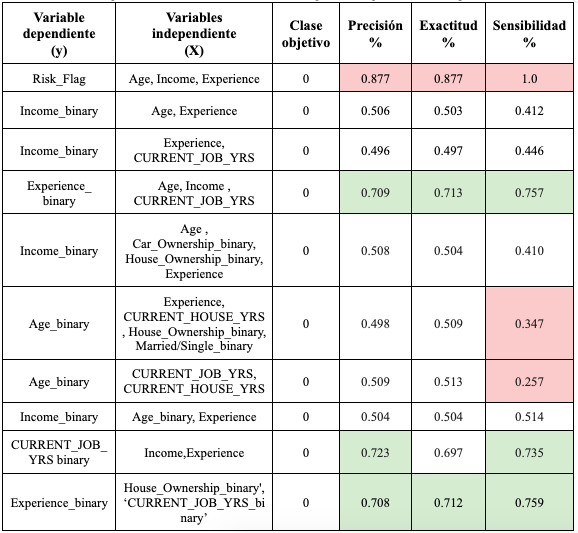

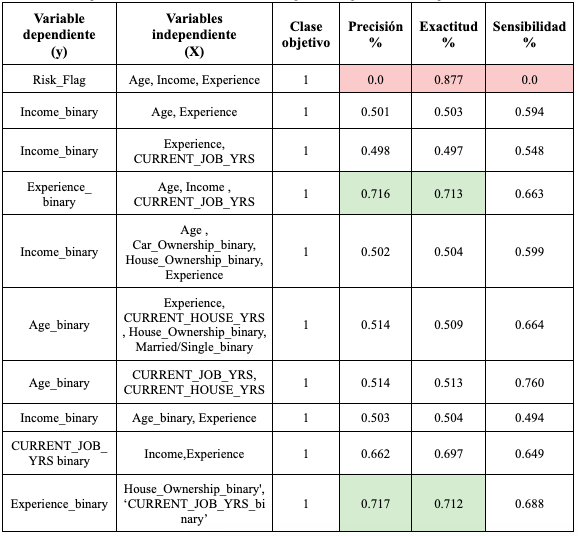